<a href="https://colab.research.google.com/github/rakeshnidagunda/ML_DataCleaning/blob/main/Function_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function transformation is used for converting non normal distribution to normal distribution.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from google.colab import files
files.upload_file('loan.csv')

Saved loan.csv to /content/loan.csv


In [45]:
data=pd.read_csv('loan.csv')
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [46]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


/tmp/ipython-input-1297853392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


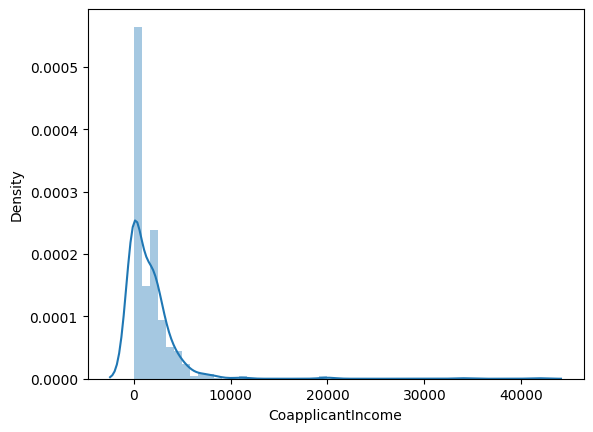

In [47]:
sns.distplot(data['CoapplicantIncome'])
plt.show()

In [48]:
q1=data['CoapplicantIncome'].quantile(0.25)
q3=data['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
iqr

np.float64(2297.25)

In [49]:
minRange=q1-1.5*iqr
maxRange=q3+1.5*iqr
minRange,maxRange

(np.float64(-3445.875), np.float64(5743.125))

In [50]:
data=data[data['CoapplicantIncome']<=maxRange]
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


/tmp/ipython-input-3640605523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


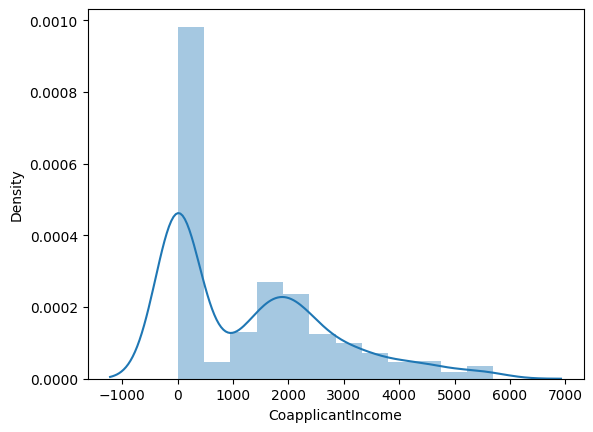

In [51]:
sns.distplot(data['CoapplicantIncome'])
plt.show()#removed outlier

Function transformation using log function

In [52]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)

In [53]:
ft.fit(data['CoapplicantIncome'])

FunctionTransformer(func=<ufunc 'log1p'>)

In [54]:
data['CoapplicantIncome_ft']=ft.transform(data['CoapplicantIncome'])

/tmp/ipython-input-3553766770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])
/tmp/ipython-input-3553766770.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome_ft'])


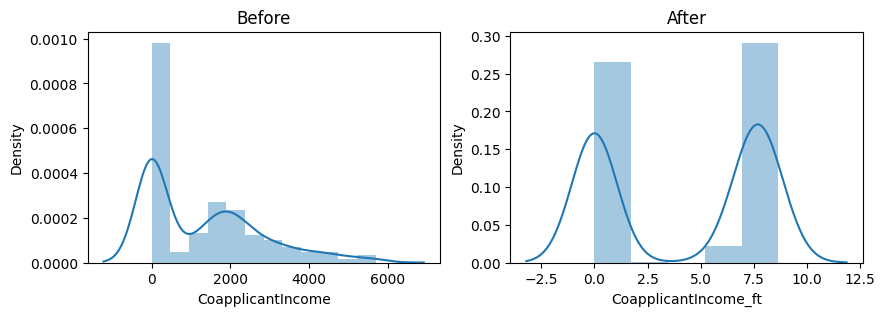

In [55]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(data['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(data['CoapplicantIncome_ft'])
plt.show()

using square method

In [56]:
ft1=FunctionTransformer(func=lambda x : x**2)
ft1.fit(data['CoapplicantIncome'])

FunctionTransformer(func=<function <lambda> at 0x7daa2c1fb740>)

In [57]:
data['CoapplicantIncome_ft1']=ft1.transform(data['CoapplicantIncome'])

/tmp/ipython-input-1293765612.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])
/tmp/ipython-input-1293765612.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome_ft1'])


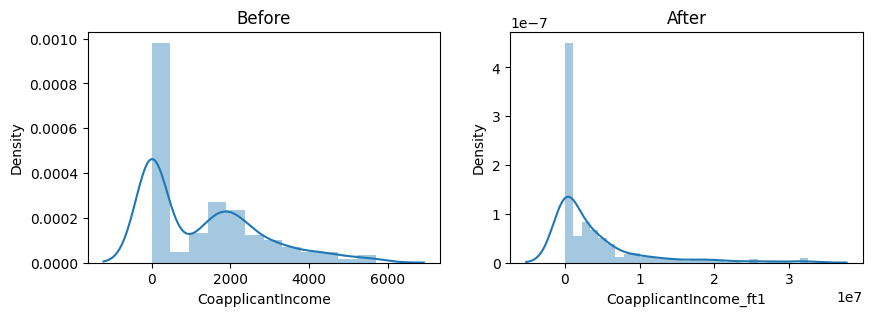

In [58]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(data['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(data['CoapplicantIncome_ft1'])
plt.show()

there is no limitation for using this function. we need to use which function gives better result based on that